In [1]:
from __future__ import division
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pprint import pprint
from __future__ import division
import sys
old_displayhook=sys.displayhook
def displ(x):
   if x is None: return
   pprint(x,width=40,depth=1)

sys.displayhook=displ

There is nothing so practical as a good theory. In this section, we establish
the formal framework for thinking about machine learning.  This framework will
help us think beyond particular methods for machine learning so we can
integrate new methods or combine existing methods intelligently.

Both machine learning and statistics share the common goal of trying to derive
understanding from data.  Some historical perspective helps. Most of the
methods in statistics were derived towards the start of the 20th century when
data were hard to come by. Society was preoccupied with the potential dangers
of human overpopulation and work was focused on studying agriculture and
crop yields. At this time, even a dozen data points was considered
plenty.  Around the same time, the deep foundations of probability were being
established by Kolmogorov. Thus, the lack of data meant that the conclusions
had to be buttressed by strong assumptions and solid  mathematics provided by
the emerging theory of probability.  Furthermore, inexpensive powerful
computers were not yet widely available. The situation today is much different:
there are lots of data collected and powerful and easily programmable computers
are available. The important problems no longer revolve around a dozen data
points on a farm acre, but rather millions of points on a square millimeter of
a DNA microarray.  Does this mean that statistics will be superseded by machine
learning?

In contrast to classical statistics, which is concerned with developing models
that characterize, explain, and describe phenomena, machine learning is
primarily concerned with prediction, usually at the expense of all else.  Areas
like exploratory statistics are very closely related to machine learning, but
the degree of emphasis on prediction is still distinguishing.  In some sense,
this is unavoidable due the size of the data machine learning can reduce.  In
other words, machine learning can help distill a table of a million columns
into one hundred columns, but can we still interpret one hundred columns
meaningfully? In classical statistics,  this was never an issue because data
were of a much smaller scale.   Whereas mathematical models, usually normal
distributions, fitted with observations are common in statistics, machine
learning uses data to construct models that sit on complicated data structures
and exploit nonlinear optimizations that lack closed-form solutions. A common
maxim is that statistics is data plus analytical theory and machine learning is
data plus computable structures. This makes it seem like machine learning is
completely ad-hoc and devoid of underlying theory, but this is not the case,
and both machine learning and statistics share many important theoretical
results. By way of contrast, let us consider a concrete problem.

Let's consider the classic balls in urns problem (see [Figure](#fig:learning_theory_tmp_001)): we have an urn containing red and
blue balls and we draw five balls from the urn, note the color of each
ball, and then try to determine the proportion of red and blue balls
in the urn. We have already studied many statistical methods for
dealing with this problem in previous sections. Now, let's generalize
the problem slightly.  Suppose the urn is filled with white balls and
there is some target unknown function $f$ that paints each selected
ball either red or blue (see [Figure](#fig:learning_theory_tmp_002)).
The machine learning problem is how to find the $f$ function, given
only the observed red/blue balls. So far, this doesn't sound much
different from the statistical problem. However, now we want to take
our estimated $f$ function, say, $\hat{f}$, and use it to predict the
next handful of balls from another urn.  Now, here's where the story
takes a sharp turn. Suppose the next urn *already* has some red and
blue balls in it?  Then, applying the function $f$ may result in
purple balls which were not seen in the *training* data (see [Figure](#fig:learning_theory_tmp_003)). Now, what can we do?  We have just
scraped the surface of the issues machine learning must confront using
methods that are not part of the statistics canon.

<!-- dom:FIGURE: [fig-machine_learning/learning_theory_tmp_001.png, width=500 frac=0.50] In the classical statistics problem, we observe a sample and model what the urn contains. <div id="fig:learning_theory_tmp_001"></div> -->
<!-- begin figure -->
<div id="fig:learning_theory_tmp_001"></div>

<p>In the classical statistics problem, we observe a sample and model what the urn contains.</p>
<img src="fig-machine_learning/learning_theory_tmp_001.png" width=500>

<!-- end figure -->


<!-- dom:FIGURE: [fig-machine_learning/learning_theory_tmp_002.png, width=500 frac=0.60] In the machine learning problem, we want the function that colors the marbles. <div id="fig:learning_theory_tmp_002"></div> -->
<!-- begin figure -->
<div id="fig:learning_theory_tmp_002"></div>

<p>In the machine learning problem, we want the function that colors the marbles.</p>
<img src="fig-machine_learning/learning_theory_tmp_002.png" width=500>

<!-- end figure -->


<!-- dom:FIGURE: [fig-machine_learning/learning_theory_tmp_003.png, width=500 frac=0.60] The problem is further complicated because we may see colored marbles that were not present in the original problem.  <div id="fig:learning_theory_tmp_003"></div> -->
<!-- begin figure -->
<div id="fig:learning_theory_tmp_003"></div>

<p>The problem is further complicated because we may see colored marbles that were not present in the original problem.</p>
<img src="fig-machine_learning/learning_theory_tmp_003.png" width=500>

<!-- end figure -->


## Introduction to Theory of Machine Learning

Some formality and an example can get us going. We define the unknown
target function, $f:\mathcal{X} \mapsto \mathcal{Y}$. The training set
is $\left\{(x,y)\right\}$ which means that we only see the function's
inputs/outputs. The hypothesis set $\mathcal{H}$ is the set of all
possible guesses at $f$. This is the set from which we will ultimately
draw our final estimate, $\hat{f}$. The machine learning problem is
how to  derive the best element from the hypothesis set by using the
training set.  Let's consider a concrete example in the code below.
Suppose $\mathcal{X}$ consists of all three-bit vectors (i.e.,
$\mathcal{X}=\left\{000,001,\ldots,111\right\}$) as in the code below,

In [3]:
import pandas as pd
import numpy as np
from pandas import DataFrame
df=DataFrame(index=pd.Index(['{0:04b}'.format(i) for i in range(2**4)],
                            dtype='str',
                            name='x'),columns=['f'])

**Programming Tip.**

The string specification above uses Python's advanced string
formatting mini-language. In this case, the specification says to
convert the integer into a fixed-width, four-character (`04b`) binary
representation.



 Next, we define the target function $f$ below which just
checks if the number of zeros in the binary representation exceeds the
number of ones.  If so, then the function outputs `1` and `0`
otherwise (i.e., $\mathcal{Y}=\left\{0,1\right\}$).

In [4]:
df.f=np.array(df.index.map(lambda i:i.count('0')) 
               > df.index.map(lambda i:i.count('1')),dtype=int)
df.head(8) # show top half only

,f
x,
0000,1
0001,1
0010,1
0011,0
0100,1
0101,0
0110,0
0111,0


 The hypothesis set for this problem is the set of *all*
possible functions of $\mathcal{X}$. The set $\mathcal{D}$ represents
all possible input/output pairs. The corresponding hypothesis set
$\mathcal{H}$ has $2^{16}$ elements, one of which matches $f$. There are
$2^{16}$ elements in the hypothesis set because for each of sixteen
input elements, there are two possible corresponding values zero or
one for each input. Thus, the size of the hypothesis set is $2\times
2\times\ldots\times 2=2^{16}$.  Now, presented
with a training set consisting of the first eight input/output pairs,
our goal is to minimize errors over the training set
($E_{\texttt{in}}(\hat{f})$).  There are $2^8$ elements from the
hypothesis set that exactly match $f$ over the training set.  But how
to pick among these $2^8$ elements?  It seems that we are stuck here.
We need another element from the problem in order to proceed. The
extra piece we need is to assume that the training set represents a
random sampling (*in-sample* data) from a greater population
(*out-of-sample* data) that would be consistent with the population
that $\hat{f}$ would ultimately predict upon. In other words, we are
assuming a stable probability structure for both the in-sample and
out-of-sample data. This is a major assumption!


There is a subtle consequence of this assumption --- whatever the
machine learning method does once deployed, in order for it to
continue to work, it cannot disturb the data environment that it was
trained on. Said differently, if the method is not to be trained
continuously, then it cannot break this assumption by altering the
generative environment that produced the data it was trained on.  For
example, suppose we develop a model that predicts hospital
readmissions based on seasonal weather and patient health.  Because
the model is so effective, in the next six months, the hospital
forestalls readmissions by delivering
interventions that improve patient health.  Clearly using
the model cannot change seasonal weather, but because the hospital
used the model to change patient health, the training data used to
build the model is no longer consistent with the forward-looking
health of the patients.  Thus, there is little reason to think that
the model will continue to work as well going forward.

Returning to our example,  let's suppose that the first eight elements from
$\mathcal{X}$ are twice as likely as the last eight. The following code is a
function that generates elements from $\mathcal{X}$ according to this
distribution.

In [5]:
np.random.seed(12)
def get_sample(n=1):
   if n==1:
      return '{0:04b}'.format(np.random.choice(range(8)*2+range(8,16)))
   else:
      return [get_sample(1) for _ in range(n)]

**Programming Tip.**

The function that returns random samples uses the
`np.random.choice` function from Numpy which takes samples (with replacement)
from the given iterable.  Because we want the first eight numbers to be twice
as frequent as the rest, we simply repeat them in the iterable using
`range(8)*2`. Recall that multiplying a Python list by an integer duplicates
the entire list by that integer. It does not do element-wise multiplication as
with Numpy arrays. If we wanted the first eight to be 10 times more frequent,
then we would use `range(8)*10`, for example. This is a simple but powerful
technique that requires very little code. Note that the `p` keyword argument in
`np.random.choice` also provides an explicit way to specify more  complicated
distributions.



 The next block applies the function definition $f$ to the
sampled data to generate the training set consisting of eight elements.

In [6]:
train=df.f.ix[get_sample(8)] # 8-element training set
train.index.unique().shape    # how many unique elements?

(6L,)

 Notice that even though there are eight elements, there is redundancy
because these are drawn according to an underlying probability.  Otherwise, if
we just got all sixteen different elements, we would have a training set
consisting of the complete specification of $f$ and then we would therefore
know what $h\in \mathcal{H}$ to pick! However, this effect gives us a clue as
to how this will ultimately work. Given the elements in the training set,
consider the set of elements from the hypothesis set that exactly match.  How
to choose among these? The answer is it does not matter! Why? Because under the
assumption that the prediction will be used in an environment that is
determined by the same probability, getting something outside of the training
set is just as likely as getting something inside the training set.  The size
of the training set is key here --- the bigger the training set, the less
likely that there will be real-world data that fall outside of it and the
better $\hat{f}$ will perform [^complexity].  The following code shows the
elements of the training set in the context of all possible data. 

[^complexity]: This assumes that the hypothesis set is big enough to capture
the entire training set (which it is for this example). We will discuss this
trade-off in greater generality shortly.

In [7]:
df['fhat']=df.f.ix[train.index.unique()]
df.fhat

x
0000   NaN
0001   NaN
0010     1
0011     0
0100     1
0101   NaN
0110     0
0111   NaN
1000     1
1001     0
1010   NaN
1011   NaN
1100   NaN
1101   NaN
1110   NaN
1111   NaN
Name: fhat, dtype: float64

 Note that there are `NaN` symbols where the training set had
no values. For definiteness, we fill these in with zeros, although we
can fill them with anything we want so long as whatever we do is not
determined by the training set.

In [8]:
df.fhat.fillna(0,inplace=True) #final specification of fhat

 Now, let's pretend we have deployed this and generate some
test data.

In [9]:
test= df.f.ix[get_sample(50)]
(df.ix[test.index]['fhat'] != test).mean()

0.17999999999999999

 The result shows the error rate, given the probability
mechanism that is generating the data.  The following Pandas-fu
compares the overlap between the training set and the test set in the
context of all possible data.  The `NaN` values show the rows where
the test data had items absent in the training data. Recall that the
method returns zero for these items.  As shown, sometimes this works
in its favor, and sometimes not.

In [10]:
pd.concat([test.groupby(level=0).mean(), 
           train.groupby(level=0).mean()],
          axis=1,
          keys=['test','train'])

,test,train
0000,1,NaN
0001,1,NaN
0010,1,1
0011,0,0
0100,1,1
0101,0,NaN
0110,0,0
0111,0,NaN
1000,1,1
1001,0,0


 Note that where the test data and training data share
elements, they agree. When the test set produced an unseen element, it
produces a match or not.

**Programming Tip.**

The `pd.concat` function concatenates the two `Series` objects in the
list. The `axis=1` means join the two objects along the columns where
each newly created column is named according to the given `keys`. The
`level=0` in the `groupby` for each of the `Series` objects  means
group along the index. Because the index corresponds to the 4-bit
elements, this accounts for repetition in the elements. The `mean`
aggregation function computes the values of the function for each
4-bit element. Because all functions in each  respective group have
the same value, the `mean` just picks out that value
because the average of a list of constants is that constant.



Now, we are in position to ask how big the training set should be to achieve a
level of performance. For example, on average, how many in-samples do we need
for a given error rate? For this problem, we can ask how large (on average)
must the training set be in order to capture *all* of the possibilities and
achieve perfect out-of-sample error rates?  For this problem, this turns out
to be sixty-three [^coupon].  Let's start over and retrain with these many
in-samples.

[^coupon]: This is a slight generalization of the classic coupon collector problem.

In [11]:
train=df.f.ix[get_sample(63)] 
del df['fhat']   
df['fhat']=df.f.ix[train.index.unique()]
df.fhat.fillna(0,inplace=True) #final specification of fhat
test= df.f.ix[get_sample(50)] 
(df.fhat.ix[test] != df.f.ix[test]).mean() # error rate

0.0

 Notice that this bigger training set has a better error rate because
it is able to identify the best element from the hypothesis set because the
training set captured more of the complexity of the unknown $f$. This example
shows the trade-offs between the size of the training set, the complexity of
the target function, the probability structure of the data, and the size of the
hypothesis set. 

## Theory of Generalization

What we really want to know is how the our method will perform once deployed.
It would be nice to have some kind of performance guarantee. In other words, we
worked hard to minimize the errors in the training set, but what errors can we expect at deployment? In training, we minimized the
in-sample error, $E_{\texttt{in}}(\hat{f}) $, but that's not good enough.  We
want guarantees about the out-of-sample error, $ E_{\texttt{out}}(\hat{f})$.
This is what *generalization* means in machine learning. The
mathematical statement of this is the following,

$$
\mathbb{P}\left( \lvert E_{\texttt{out}}(\hat{f})-E_{\texttt{in}}(\hat{f}) \rvert > \epsilon \right) < \delta
$$

 for a given $\epsilon$ and $\delta$. Informally, this says
that the probability of the respective errors differing by more than a
given $\epsilon$ is less than some quantity, $\delta$. This basically
means that whatever the performance on the training set, it should
probably  be pretty close to the corresponding performance once
deployed.  Note that this does not say that the in-sample errors
($E_{\texttt{in}}$) are any good in an absolute sense.  It just says
that we would not expect much different after deployment.  Thus,
*good* generalization means no surprises after deployment, not
necessarily good performance, by any means.  There are two main ways
to get at this: cross-validation and probability inequalities.  Let's
consider the latter first.  There are two entangled issues: the
complexity of the hypothesis set and the probability of the data. It
turns out we can separate these two by deriving a separate notion of
complexity free from any particular data probability.


**VC Dimension.** We first need a way to quantify model complexity.
Following Wasserman [[wasserman2004all]](#wasserman2004all), let $\mathcal{A}$ be a
class of sets and $F = \left\{x_1,x_2,\ldots,x_n\right\}$, a set of
$n$ data points. Then, we define

$$
N_{\mathcal{A}}(F)=\# \left\{ F \cap A : A \in \mathcal{A}\right\}
$$

 This counts the number of subsets of $F$ that can be extracted by the
sets of $\mathcal{A}$. The number of items in the set (i.e., cardinality) is
noted by the $\#$ symbol.  For example, suppose $F=\left\{1\right\}$ and
$\mathcal{A}=\left\{(x\leq a)\right\}$.  In other words, $\mathcal{A}$ consists
of all intervals closed on the right and parameterized by $a$. In this case we
have $N_{\mathcal{A}}(F)=1$ because all elements can be extracted from $F$
using $\mathcal{A}$.


The *shatter coefficient* is defined as,

$$
s(\mathcal{A},n) = \max_{F\in \mathcal{F}_n} N_{\mathcal{A}}(F)
$$

 where $\mathcal{F}$ consists of all finite sets of size $n$. Note
that this sweeps over all finite sets so we don't need to worry about any
particular data set of finitely many points. The definition is concerned with
$\mathcal{A}$ and how its sets can pick off elements from the data set. A
set $F$ is *shattered* by $\mathcal{A}$ if it can pick out every element in it.
This provides a sense of how the complexity in $\mathcal{A}$ consumes data. In
our last example, the set of half-closed intervals shattered every singleton
set $\left\{x_1\right\}$. 

Now, we come to the main definition of the Vapnik-Chervonenkis
[[vapnik2000nature]](#vapnik2000nature) dimension $d_{\texttt{VC}}$ which defined as the largest
$k$ for which $s(\mathcal{A},n) = 2^k$, except in the case where
$s(\mathcal{A},n) = 2^n$ for which it is defined as  infinity. For our example
where $F= \left\{x_1\right\}$, we already saw that $\mathcal{A}$ shatters $F$.
How about when $F=\left\{x_1,x_2\right\}$? Now, we have two points and we have
to consider whether all subsets can be  extracted by $\mathcal{A}$. In this
case, there are four subsets,
$\left\{\o,\left\{x_1\right\},\left\{x_2\right\},\left\{x_1,x_2\right\}
\right\}$.  Note that $\o$ denotes the empty set. The empty set is easily
extracted --- pick $a$ so that it is smaller than both
$x_1$ and $x_2$.  Assuming that $x_1<x_2$, we can get the next set by
choosing $x_1<a<x_2$. The last set is likewise do-able by choosing $x_2<a$.
The problem is that we cannot capture the third set, $\left\{x_2\right\}$,
without capturing $x_1$ as well.  This means that we cannot shatter any
finite set with $n=2$ using $\mathcal{A}$. Thus, $d_{\texttt{VC}}=1$.

Here is the climatic result

$$
E_{\texttt{out}}(\hat{f}) \leq E_{\texttt{in}}(\hat{f}) + \sqrt{\frac{8}{n}\ln \left( \frac{4 ((2 n)^{ d_{\texttt{VC}} }+1)}{\delta} \right) }
$$

 with probability at least $1-\delta$. This basically says that the
expected out-of-sample error can be no worse than the in-sample error plus a
penalty due to the complexity of the hypothesis set. The expected in-sample error
comes from the training set but the complexity penalty comes
from just the hypothesis set, so we have disentangled these two issues.

A general result like this, for which we do not worry about the probability of
the data, is certain to be pretty generous, but nonetheless, it tells us how
the complexity penalty enters into the out-of-sample error.  In other words,
the bound on $E_{\texttt{out}}(\hat{f})$ gets worse for a more complex
hypothesis set. Thus, this generalization bound is a useful guideline but not
very practical if we want to get a good estimate of
$E_{\texttt{out}}(\hat{f})$.

## Worked Example for Generalization/Approximation Complexity

The stylized curves in  [Figure](#fig:learning_theory_tmp_004) illustrate the
idea that there is some optimal point of complexity that represents the best
generalization given the training set.

<!-- dom:FIGURE: [fig-machine_learning/learning_theory_tmp_004.pdf, width=500 frac=0.80] In the ideal situation, there is a *best model* that represents the optimal trade-off between complexity and error. This is shown by the vertical line.   <div id="fig:learning_theory_tmp_004"></div> -->
<!-- begin figure -->
<div id="fig:learning_theory_tmp_004"></div>

<p>In the ideal situation, there is a <em>best model</em> that represents the optimal trade-off between complexity and error. This is shown by the vertical line.</p>
<img src="fig-machine_learning/learning_theory_tmp_004.pdf" width=500>

<!-- end figure -->


To get a firm handle on these curves, let's develop a simple one-dimensional
machine learning method and go through the steps to create this graph.  Let's
suppose we have a training set consisting of x-y pairs
$\left\{(x_i,y_i)\right\}$. Our method groups the x-data into intervals
and then averages the y-data in those intervals. Predicting for new x-data
means simply identifying the interval containing the new data then reporting
the corresponding value. In other words, we are building a simple
one-dimensional, nearest neighbor classifier. For example, suppose the training set
x-data is the following,

In [12]:
train=DataFrame(columns=['x','y'])
train['x']=np.sort(np.random.choice(range(2**10),size=90))
train.x.head(10) # first ten elements

0     15
1     30
2     45
3     65
4     76
5     82
6    115
7    145
8    147
9    158
Name: x, dtype: int32

 In this example, we took a random set of 10-bit integers. To group these
into, say, ten intervals, we simply use Numpy reshape as in the following,

In [13]:
train.x.reshape(10,-1)

array([[ 15,  30,  45,  65,  76,  82, 115, 145, 147],
       [158, 165, 174, 175, 181, 209, 215, 217, 232],
       [233, 261, 271, 276, 284, 296, 318, 350, 376],
       [384, 407, 410, 413, 452, 464, 472, 511, 522],
       [525, 527, 531, 534, 544, 545, 548, 567, 567],
       [584, 588, 610, 610, 641, 645, 648, 659, 667],
       [676, 683, 684, 697, 701, 703, 733, 736, 750],
       [754, 755, 772, 776, 790, 794, 798, 804, 830],
       [831, 834, 861, 883, 910, 910, 911, 911, 937],
       [943, 946, 947, 955, 962, 962, 984, 989, 998]])

 where every row is one of the groups. Note that the range of each
group (i.e., length of the interval) is not preassigned, and is learned from
the training data. For this example, the y-values correspond to the number of
ones in the bit representation of the x-values. The following code defines this
target function,

In [14]:
f_target=np.vectorize(lambda i:sum(map(int,i)))

**Programming Tip.**

The above function uses `np.vectorize` which is a convenience method in Numpy
that converts plain Python functions into Numpy versions. This basically saves
additional looping semantics and makes it easier to use with other Numpy
arrays and functions.



 Next, we create the bit representations of all of the x-data below and
then complete training set y-values,

In [15]:
train['xb']= train.x.map('{0:010b}'.format)
train.y=train.xb.map(f_target)
train.head(5)

,x,y,xb
0,15,4,0000001111
1,30,4,0000011110
2,45,4,0000101101
3,65,2,0001000001
4,76,3,0001001100


To train on this data, we just group by the specified amount and then
average the y-data over each group.

In [16]:
train.y.reshape(10,-1).mean(axis=1)

array([ 3.55555556,  4.88888889,  4.44444444,  4.88888889,  4.11111111,
        4.        ,  6.        ,  5.11111111,  6.44444444,  6.66666667])

 Note that the `axis=1` keyword argument just means average across the
 columns. So far, this defines the training.  To predict using this
method, we have to extract the edges from each of the groups and then fill in
with the group-wise mean we just computed for `y`. The following code extracts
the edges of each group.

In [17]:
le,re=train.x.reshape(10,-1)[:,[0,-1]].T
print le # left edge of group
print re # right edge of group

[ 15 158 233 384 525 584 676 754 831 943]
[147 232 376 522 567 667 750 830 937 998]


 Next, we compute the group-wise means and assign them to their
respective edges.

In [18]:
val = train.y.reshape(10,-1).mean(axis=1).round()
func = pd.Series(index=range(1024))
func[le]=val    # assign value to left edge
func[re]=val    # assign value to right edge
func.iloc[0]=0  # default 0 if no data
func.iloc[-1]=0 # default 0 if no data
func.head()

0     0
1   NaN
2   NaN
3   NaN
4   NaN
dtype: float64

 Note that the Pandas `Series` object automatically fills in
unassigned values with `NaN`. We have thus far only filled in values at the
edges of the groups. Now, we need to fill in the intermediate values.

In [19]:
fi=func.interpolate('nearest')
fi.head()

0    0
1    0
2    0
3    0
4    0
dtype: float64

 The `interpolate` method of the `Series` object can apply a wide
variety of powerful interpolation methods, but we only need the simple nearest
neighbor method to create our piecewise approximant.  [Figure](#fig:learning_theory_001) shows how this looks for the training data we have
created.

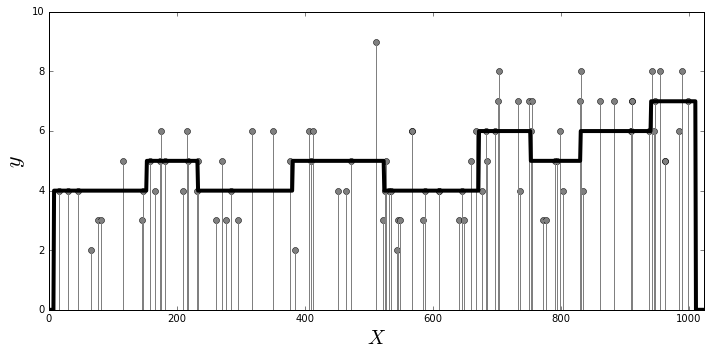

In [20]:
%matplotlib inline

from matplotlib.pylab import subplots, mean, arange, setp
fig,ax=subplots()
fig.set_size_inches((10,5))
_=ax.axis(xmax=1024,ymax=10)
v=ax.stem(train.x,train.y,markerfmt='go',linefmt='g-')
_=setp(v,color='gray')
_=fi.plot(ax=ax,lw=4.,color='k')
_=ax.set_xlabel('$X$',fontsize=20)
_=ax.set_ylabel('$y$',fontsize=22)
fig.tight_layout()
#fig.savefig('fig-machine_learning/learning_theory_001.png')

<!-- dom:FIGURE: [fig-machine_learning/learning_theory_001.png, width=500 frac=0.85] The vertical lines show the training data and the thick black line is the approximant we have learned from the training data. <div id="fig:learning_theory_001"></div> -->
<!-- begin figure -->
<div id="fig:learning_theory_001"></div>

<p>The vertical lines show the training data and the thick black line is the approximant we have learned from the training data.</p>
<img src="fig-machine_learning/learning_theory_001.png" width=500>

<!-- end figure -->


Now, with all that established, we can now  draw the curves for this machine
learning method. Instead of partitioning the training data for cross-validation
(which we'll discuss later), we can simulate test data using the same mechanism
as for the training data, as shown next,

In [21]:
test=pd.DataFrame(columns=['x','xb','y'])
test['x']=np.random.choice(range(2**10),size=500)
test.xb= test.x.map('{0:010b}'.format)
test.y=test.xb.map(f_target)
test.sort(columns=['x'],inplace=True)

D:\Miniconda64\envs\test2_ipynb\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


 The curves are the respective errors for the training data
and the testing data. For our error measure, we use the mean-squared-error,

$$
E_{\texttt{out}} = \frac{1}{n} \sum_{i=1}^n (\hat{f}(x_i) - y_i)^2
$$

 where $\left\{(x_i,y_i)\right\}_{i=1}^n$ come from the test data. The
in-sample error ($E_{\texttt{in}}$) is defined the same except for the
in-sample data.  In this example, the size of each group is proportional to
$d_{\texttt{VC}}$, so the more groups we choose, the more complexity in the
fitting.  Now, we have all the ingredients to understand the trade-offs of
complexity versus error.

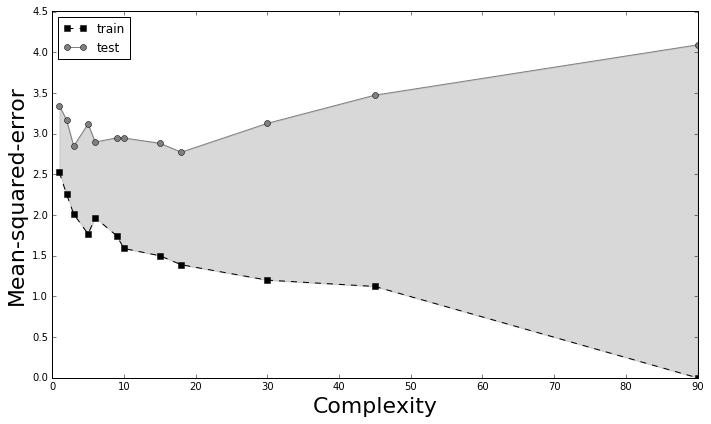

In [22]:
n=train.shape[0]
divisors=arange(1,n+1)[(n % arange(1,n+1))==0]
def atrainer(train,dvc):
    le,re=train.x.reshape(dvc,-1)[:,[0,-1]].T
    val = train.y.reshape(dvc,-1).mean(axis=1).round()
    func = pd.Series(index=range(1024))
    func[le]=val
    func[re]=val
    func.iloc[0]=0
    func.iloc[-1]=0
    fi=func.interpolate('nearest')
    return fi

otrn=[]; otst=[]
for i in divisors: # loop over divisors
    fi=atrainer(train,i)
    otrn.append((mean((fi[train.x].values-train.y.values)**2)))
    otst.append((mean((fi[test.x].values-test.y.values)**2)))

fig,ax=subplots()
fig.set_size_inches((10,6))
_=ax.plot(divisors,otrn,'--s',label='train',color='k')
_=ax.plot(divisors,otst,'-o',label='test',color='gray')
_=ax.fill_between(divisors,otrn,otst,color='gray',alpha=.3)
_=ax.legend(loc=0)
_=ax.set_xlabel('Complexity',fontsize=22)
_=ax.set_ylabel('Mean-squared-error',fontsize=22)
fig.tight_layout()
#fig.savefig('fig-machine_learning/learning_theory_002.png')

[Figure](#fig:learning_theory_002) shows the curves for our
one-dimensional clustering method.  The dotted line shows the
mean-squared-error on the training set and the other line shows the
same for the test data. The shaded region is the *complexity penalty*
of this method.  Note that with enough complexity, the method can
exactly memorize the testing data, but that only penalizes the testing
error ($E_{\texttt{out}}$). This effect is exactly what the
Vapnik-Chervonenkis theory expresses. The horizontal axis is
proportional to the VC-dimension. In this case, complexity boils down
to the number of intervals used in the sectioning. At the far right,
we have as many intervals as there are elements in the data set,
meaning that every element is wrapped in its own interval. The average
value of the data in that interval is therefore just the corresponding
$y$ value because there are no other elements to average over. The
Jupyter/IPython notebook corresponding to the section has the code to
generate these curves so you can see how these curves change with
bigger or smaller data sets.

<!-- dom:FIGURE: [fig-machine_learning/learning_theory_002.png, width=500 frac=0.85] The dotted line shows the mean-squared-error on the training set and the other line shows the same for the test data. The shaded region is the *complexity penalty* of this method. Note that as the complexity of the model increases, the training error decreases, and the method essentially memorizes the data. However, this improvement in training error comes at the cost of larger testing error. <div id="fig:learning_theory_002"></div> -->
<!-- begin figure -->
<div id="fig:learning_theory_002"></div>

<p>The dotted line shows the mean-squared-error on the training set and the other line shows the same for the test data. The shaded region is the <em>complexity penalty</em> of this method. Note that as the complexity of the model increases, the training error decreases, and the method essentially memorizes the data. However, this improvement in training error comes at the cost of larger testing error.</p>
<img src="fig-machine_learning/learning_theory_002.png" width=500>

<!-- end figure -->



Before we leave this problem, there is another way to visualize the
performance of our learning method. This problem can be thought of as
a multi-class identification problem. Given a 10-bit integer, the
number of ones in its binary representation is in one of the classes
$\left\{0,1,\ldots,10\right\}$.  The output of the model tries to put
each integer in its respective class. How well this was done can be
visualized using a *confusion matrix* as shown in the next code block,

In [23]:
from sklearn.metrics import confusion_matrix
cmx=confusion_matrix(test.y.values,fi[test.x].values)
print cmx

[[ 1  0  0  0  0  0  0  0  0  0]
 [ 1  0  1  0  1  1  0  0  0  0]
 [ 0  0  3  9  7  4  0  0  0  5]
 [ 1  0  3 23 19  6  6  0  2  0]
 [ 0  0  1 26 27 14 27  2  2  0]
 [ 0  0  3 15 31 28 30  8  1  0]
 [ 0  0  1  8 18 20 25 23  2  2]
 [ 1  0  1 10  5 13  7 19  3  6]
 [ 4  0  1  2  0  2  2  7  4  3]
 [ 2  0  0  0  0  1  0  0  0  0]]


 The rows of this $10 \times 10$ matrix show what the true class was
and the columns indicate the class that the model predicted.  The numbers in
the matrix indicate the number of times that association was made. For example,
the first row shows that there was one entry in the test set with no ones in
its binary representation (i.e, namely the number zero) and it was correctly
classified (namely, it is in the first row, first column of the matrix). The
second row shows there were four entries total in the test set with a binary
representation containing exactly a single one. This was incorrectly classified
as the 0-class (i.e, first column) once, the 2-class (third column) once, the
4-class (fifth column) once, and the 5-class (sixth column) once.  It was never
classified correctly because the second column is zero for this row. In other
words, the diagonal entries show the number of times it was correctly
classified.

Using this matrix, we can easily estimate the true-detection
probability that we covered earlier in our hypothesis testing section,

In [24]:
print cmx.diagonal()/cmx.sum(axis=1)

[ 1.          0.          0.10714286  0.38333333  0.27272727  0.24137931
  0.25252525  0.29230769  0.16        0.        ]


 In other words, the first element is the probability of detecting `0`
when `0` is in force, the second element is the probability of detecting `1`
when `1` is in force, and so on. We can likewise compute the false-alarm rate
for each of the classes in the following,

In [25]:
print (cmx.sum(axis=0) - cmx.diagonal())/(cmx.sum()-cmx.sum(axis=1))

[ 0.01803607  0.          0.02330508  0.15909091  0.20199501  0.15885417
  0.17955112  0.09195402  0.02105263  0.03219316]


**Programming Tip.**

The Numpy `sum` function can sum across a particular axis or, if the
axis is unspecified, will sum all entries of the array.



 In this case, the first element is the probability that `0`
is declared when another category is in force, the next element is the
probability that `1` is declared when another category is in force,
and so on.. For a decent classifier, we want a true-detection
probability to be greater than the corresponding false-alarm rate,
otherwise the classifier is no better than a coin-flip. Note that, at
the time of this writing, Scikit-learn  has limited tools for this
kind of multiple class classification task.

The missing feature of this problem, from the learning
algorithm standpoint, is that we did not supply the bit representation
of every element which was used to derive the target variable, $y$.
Instead, we just used the integer value of each of the 10-bit numbers,
which essentially concealed the mechanism for creating the $y$ values.
In other words, there was a unknown transformation from the input
space $\mathcal{X}$ to $\mathcal{Y}$ that the learning algorithm had
to overcome, but that it could not overcome, at least not without
memorizing the training data. This lack of knowledge is a key issue in
all machine learning problems, although we have made it explicit here
with this stylized example. This means that there may be one or more
transformations from $\mathcal{X} \rightarrow \mathcal{X}^\prime$ that
can help learning algorithm get traction on the so-transformed space
while providing a better trade-off between generalization and
approximation than could have been achieved otherwise. Finding such
transformations is called *feature engineering*.


## Cross-Validation
<div id="ch:ml:sec:cv"></div>

In the last section, we explored a stylized machine learning example
to understand the issues of complexity in machine learning. However,
to get an estimate of out-of-sample errors, we simply generated more
synthetic data. In practice, this is not an option, so we need to
estimate these errors from the training set itself. This is what
cross-validation does.  The simplest form of cross-validation is
k-fold validation. For example, if $K=3$, then the training data is
divided into three sections wherein each of the three sections is used
for testing and the remaining two are used for training.  This is
implemented in Scikit-learn as in the following,

In [26]:
import numpy as np
from sklearn.cross_validation import KFold
data =np.array(['a',]*3+['b',]*3+['c',]*3) # example 
print data
for train_idx,test_idx in KFold(len(data),3):
   print train_idx,test_idx

['a' 'a' 'a' 'b' 'b' 'b' 'c' 'c' 'c']
[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


 In the code above, we construct a sample data array and then see
how `KFold` splits it up into indicies for training and testing, respectively.
Notice that there are no duplicated elements in each row between training and
testing indicies. To examine the elements of the data set in each category, we simply
use each of the indicies as in the following,

In [27]:
for train_idx,test_idx in KFold(len(data),3):
   print 'training', data[ train_idx ]
   print 'testing' , data[ test_idx ]

training ['b' 'b' 'b' 'c' 'c' 'c']
testing ['a' 'a' 'a']
training ['a' 'a' 'a' 'c' 'c' 'c']
testing ['b' 'b' 'b']
training ['a' 'a' 'a' 'b' 'b' 'b']
testing ['c' 'c' 'c']


 This shows how each group is used in turn for training/testing. There
is no random shuffling of the data unless the `shuffle` keyword argument is
given.  The error over the test set is th *cross-validation error*. The idea is
to postulate models of differing complexity and then pick the one with the best
cross-validation error. For example, suppose we had the following sine wave
data,

In [28]:
xi = np.linspace(0,1,30)
yi = np.sin(2*np.pi*xi)

 and we want to fit this with polynomials of increasing order.

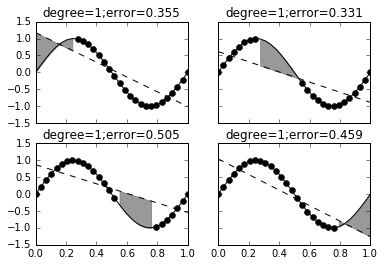

In [29]:
fig,axs=subplots(2,2,sharex=True,sharey=True)
deg = 1 # polynomial degree
for ax,(train_idx,test_idx) in zip(axs.flat,KFold(len(xi),4)):
    _=ax.plot(xi,yi,xi[train_idx],yi[train_idx],'ok',color='k')
    p = np.polyfit(xi[train_idx],yi[train_idx],deg)
    pval = np.polyval(p,xi)
    _=ax.plot(xi,pval,'--k')
    error = np.mean((pval[test_idx]-yi[test_idx])**2)
    _=ax.set_title('degree=%d;error=%3.3g'%(deg,error))
    _=ax.fill_between(xi[test_idx],pval[test_idx],yi[test_idx],color='gray',alpha=.8)

#fig.savefig('fig-machine_learning/learning_theory_003.png')

<!-- dom:FIGURE: [fig-machine_learning/learning_theory_003.png, width=500 frac=0.85] This shows the folds and errors for the linear model. The shaded areas show the errors in each respective test set (i.e, *cross-validation scores*) for the linear model. <div id="fig:learning_theory_003"></div> -->
<!-- begin figure -->
<div id="fig:learning_theory_003"></div>

<p>This shows the folds and errors for the linear model. The shaded areas show the errors in each respective test set (i.e, <em>cross-validation scores</em>) for the linear model.</p>
<img src="fig-machine_learning/learning_theory_003.png" width=500>

<!-- end figure -->


[Figure](#fig:learning_theory_003) shows the individual folds in each
panel.  The circles represent the training data. The diagonal line is
the fitted polynomial. The gray shaded areas indicate the regions of
errors between the fitted polynomial and the held-out testing data.
The larger the gray area, the bigger the cross-validation errors,
as are reported in the title of each frame.

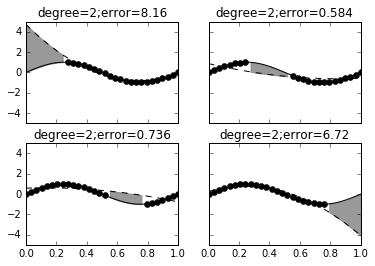

In [30]:
fig,axs=subplots(2,2,sharex=True,sharey=True)
deg = 2 # polynomial degree
for ax,(train_idx,test_idx) in zip(axs.flat,KFold(len(xi),4)):
    _=ax.plot(xi,yi,xi[train_idx],yi[train_idx],'ok',color='k')
    p = np.polyfit(xi[train_idx],yi[train_idx],deg)
    pval = np.polyval(p,xi)
    _=ax.plot(xi,pval,'--k')
    error = np.mean((pval[test_idx]-yi[test_idx])**2)
    _=ax.set_title('degree=%d;error=%3.3g'%(deg,error))
    _=ax.fill_between(xi[test_idx],pval[test_idx],yi[test_idx],color='gray',alpha=.8)

#fig.savefig('fig-machine_learning/learning_theory_004.png')

<!-- dom:FIGURE: [fig-machine_learning/learning_theory_004.png, width=500 frac=0.85] This shows the folds and errors as in [Figure](#fig:learning_theory_002) and ref{fig:learning_theory_003}. The shaded areas show the errors in each respective test set for the quadratic model. <div id="fig:learning_theory_004"></div> -->
<!-- begin figure -->
<div id="fig:learning_theory_004"></div>

<p>This shows the folds and errors as in [Figure](#fig:learning_theory_002) and ref{fig:learning_theory_003}. The shaded areas show the errors in each respective test set for the quadratic model.</p>
<img src="fig-machine_learning/learning_theory_004.png" width=500>

<!-- end figure -->

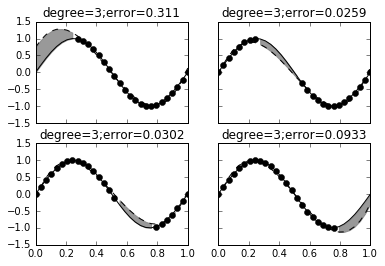

In [31]:
fig,axs=subplots(2,2,sharex=True,sharey=True)
deg = 3 # polynomial degree
for ax,(train_idx,test_idx) in zip(axs.flat,KFold(len(xi),4)):
    _=ax.plot(xi,yi,xi[train_idx],yi[train_idx],'ok',color='k')
    p = np.polyfit(xi[train_idx],yi[train_idx],deg)
    pval = np.polyval(p,xi)
    _=ax.plot(xi,pval,'--k')
    error = np.mean((pval[test_idx]-yi[test_idx])**2)
    _=ax.set_title('degree=%d;error=%3.3g'%(deg,error))
    _=ax.fill_between(xi[test_idx],pval[test_idx],yi[test_idx],color='gray',alpha=.8)

#fig.savefig('fig-machine_learning/learning_theory_005.png')

<!-- dom:FIGURE: [fig-machine_learning/learning_theory_005.png, width=500 frac=0.85] This shows the folds and errors. The shaded areas show the errors in each respective test set for the cubic model. <div id="fig:learning_theory_005"></div> -->
<!-- begin figure -->
<div id="fig:learning_theory_005"></div>

<p>This shows the folds and errors. The shaded areas show the errors in each respective test set for the cubic model.</p>
<img src="fig-machine_learning/learning_theory_005.png" width=500>

<!-- end figure -->


After reviewing the last three figures and averaging the cross-validation
errors, the one with the least average error is declared the winner. Thus, cross-validation provides a method of using a
single data set to make claims about unseen out-of-sample data insofar as the
model with the best complexity can be determined.  The entire process to
generate the above figures can be captured using `cross_val_score` as shown for
the linear regression (compare the output with the values in the titles in each
panel of  [Figure](#fig:learning_theory_003)),

In [32]:
from sklearn.metrics import  make_scorer, mean_squared_error
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
Xi = xi.reshape(-1,1) # refit column-wise
Yi = yi.reshape(-1,1)
lf = LinearRegression()
scores = cross_val_score(lf,Xi,Yi,cv=4,
                         scoring=make_scorer(mean_squared_error))
print scores

[ 0.3554451   0.33131438  0.50454257  0.45905672]


**Programming Tip.**

The `make_scorer` function is a wrapper that enables `cross_val_score` to
compute scores from the given estimator's output.



 The process can be further automated by using a pipeline as
in the following,

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
polyfitter = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])
polyfitter.get_params()

{'linear': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
 'linear__copy_X': True,
 'linear__fit_intercept': True,
 'linear__n_jobs': 1,
 'linear__normalize': False,
 'poly': PolynomialFeatures(degree=3, include_bias=True, interaction_only=False),
 'poly__degree': 3,
 'poly__include_bias': True,
 'poly__interaction_only': False,
 'steps': [('poly',
   PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)),
  ('linear',
   LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]}

 The  `Pipeline` object is a way of stacking standard steps
into one big estimator, while respecting the usual `fit` and `predict`
interfaces. The output of the `get_params` function contains the
polynomial degrees we previously looped over to create [Figure](#fig:learning_theory_003), etc. We will use these named parameters
in the next code block.  To do this automatically using this
`polyfitter` estimator, we need the Grid Search Cross Validation
object, `GridSearchCV`.  The next step is to use this to create the
grid of parameters we want to loop over as in the following,

In [34]:
from sklearn.grid_search import GridSearchCV
gs=GridSearchCV(polyfitter,{'poly__degree':[1,2,3]},cv=4)

 The `gs` object will loop over the polynomial degrees up to
cubic using four-fold cross validation `cv=4`, like we did manually
earlier. The `poly__degree` item comes from the previous `get_params`
call.  Now, we just apply the usual `fit` method on the training data,

In [35]:
_=gs.fit(Xi,Yi)
gs.grid_scores_

[mean: -3.48744, std: 2.51765, params: {'poly__degree': 1},
 mean: -36.06830, std: 28.84096, params: {'poly__degree': 2},
 mean: -0.07906, std: 0.95040, params: {'poly__degree': 3}]

 the scores shown correspond to the cross validation scores
for each of the parameters (e.g., polynomial degrees) using four-fold
cross-validation.  Note that the higher scores are better here and
the cubic polynomial is best, as we observed earlier. The default
$R^2$ metric is used for the scoring in this case as opposed to
mean-squared-error. The validation results of this pipeline for the
quadratic fit are shown in [Figure](#fig:learning_theory_004), and
for the cubic fit, in [Figure](#fig:learning_theory_005). This can
be changed by passing the
`scoring=make_scorer(mean_squared_error)` keyword argument to
`GridSearchCV`.  There is also `RandomizedSearchCV` that does
does not necessarily evaluate every point on the grid and
instead randomly samples the grid according to an input
probability distribution. This is very useful for a large number
of hyper-parameters.

## Bias and Variance

So far, we have been thinking about the average error in terms of in-samples
and out-samples, but this depends on a particular training data set. What we
want is a concept that extends to *all* possible training data and captures the
performance of the estimator in that setting. For example, our ultimate
estimator, $\hat{f}$ is derived from a particular set of training data
($\mathcal{D}$) and is thus denoted, $\hat{f}_{\mathcal{D}}$. This makes the
out-of-sample error explicitly, $E_{\texttt{out}}(\hat{f}_{\mathcal{D}})$.  To
eliminate the dependence on a particular set of training data set, we have to
compute the expectation across all training data sets,

$$
\mathbb{E}_{\mathcal{D}}E_{\texttt{out}}(\hat{f}_{\mathcal{D}})= \texttt{bias}+\texttt{var}
$$

 where

$$
\texttt{bias}(x)= (\overline{\hat{f}}(x)-f(x))^2
$$

 and

$$
\texttt{var}(x)= \mathbb{E}_{\mathcal{D}}(\hat{f}_{\mathcal{D}}(x)-\overline{\hat{f}}(x))^2
$$

 and where $\overline{\hat{f}}$ is the mean of all estimators for all
data sets. There is nothing to say that such a mean is an estimator that could
have arisen from any *particular* training data, however. It just implies that
for any particular point $x$, the mean of the values of all the estimators is
$\overline{\hat{f}}(x)$.  Therefore, $\texttt{bias}$ captures the sense
that, even if all possible data were presented to the learning method, it
would still differ from the target function by this amount.  On the other
hand $\texttt{var}$ shows the variation in the final hypothesis, depending
on the training data set, notwithstanding the target function.  Thus, the
tension between approximation and generalization is captured by these two
terms.  For example, suppose there is only one hypothesis. Then,
$\texttt{var}=0$ because there can be no variation due to a particular set
of training data because no matter what that training data is, the learning
method always selects the one and only hypothesis. In this case, the bias
could be very large, because there is no opportunity for the learning method
to alter the hypothesis due to the training data, and the method can only
ever pick the single hypothesis!

Let's construct an example to make this concrete. Suppose we have a hypothesis
set consisting of all linear regressions without an intercept term,  $h(x)=a
x$. The training data consists of only two points $\left\{(x_i,\sin(\pi
x_i))\right\}_{i=1}^2$ where $x_i$ is drawn uniformly from the interval
$[-1,1]$. From the section ref{ch:stats:sec:reg} on linear regression, we know that
the solution for $a$ is the following,

<!-- Equation labels as ordinary links -->
<div id="eq:sola"></div>

$$
\begin{equation}
a = \frac{\mathbf{x}^T \mathbf{y}}{\mathbf{x}^T \mathbf{x}}
\label{eq:sola} \tag{1}
\end{equation}
$$

 where $\mathbf{x}=[x_1,x_2]$ and $\mathbf{y}=[y_1,y_2]$. The
$\overline{\hat{f}}(x)$ represents the solution over all possible sets
of training data for a fixed $x$. The following code shows how to
construct the training data,

In [36]:
from scipy import stats
def gen_sindata(n=2):
    x=stats.uniform(-1,1) # define random variable
    v = x.rvs((n,1)) # generate sample
    y = np.sin(np.pi*v) # use sample for sine
    return (v,y)

 Again, using Scikit-learn's `LinearRegression` object, we
can compute the $a$ parameter. Note that we have to set
`fit_intercept=False` keyword to suppress the default automatic
fitting of the intercept.

In [37]:
lr = LinearRegression(fit_intercept=False)
lr.fit(*gen_sindata(2))
lr.coef_

array([[ 2.0570357]])

<!-- *foo* -->

**Programming Tip.**

Note that we designed `gen_sindata` to return a tuple to use the automatic
unpacking feature of Python functions in `lr.fit(*gen_sindata())`.  In other
words, using the asterisk notation means we don't have to separately assign the
outputs of `gen_sindata` before using them for `lr.fit`.



<!-- dom:FIGURE: [fig-machine_learning/learning_theory_006.png, width=500 frac=0.75] For a two-element training set consisting of the points shown, the line is the best fit over the hypothesis set, $h(x)=a x$. <div id="fig:learning_theory_006"></div> -->
<!-- begin figure -->
<div id="fig:learning_theory_006"></div>

<p>For a two-element training set consisting of the points shown, the line is the best fit over the hypothesis set, $h(x)=a x$.</p>
<img src="fig-machine_learning/learning_theory_006.png" width=500>

<!-- end figure -->

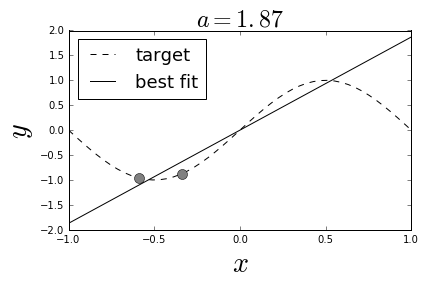

In [38]:
lr = LinearRegression(fit_intercept=False)
xi=np.linspace(-1,1,50)
yi= np.sin(np.pi*xi)
xg,yg = gen_sindata()
fig,ax=subplots()
_=lr.fit(xg,yg)
_=ax.plot(xi,yi,'--k',label='target')
_=ax.plot(xg,yg,'o',ms=10,color='gray')
_=ax.plot(xi,lr.predict(xi.reshape(-1,1)),color='k',label='best fit')
_=ax.set_title('$a=%3.3g$'%(lr.coef_),fontsize=24)
_=ax.set_xlabel(r'$x$',fontsize=28)
_=ax.set_ylabel(r'$y$',fontsize=28)
_=ax.legend(fontsize=18,loc=0)
fig.tight_layout()
#fig.savefig('fig-machine_learning/learning_theory_006.png')

 In this case, $\overline{\hat{f}}(x) = \overline{a}x$, where
$\overline{a}$ the the expected value of the parameter over *all* possible
training data sets.  Using our knowledge of probability, we can write this out
explicitly as the following,

$$
\overline{a} = \mathbb{E}\left(\frac{x_1\sin(\pi x_1)+ x_2\sin(\pi x_2) }{x_1^2+x_2^2}\right)
$$

 where $\mathbf{x}=[x_1,x_2]$ and $\mathbf{y}=[\sin(\pi x_1),\sin(\pi
x_2)]$ in Equation ref{eq:sola}. However, computing this expectation
analytically is hard, but for this specific situation, $\overline{a} \approx
1.43$. To get this value using simulation, we just loop over the process,
collect the outputs, and the average them as in the following,

In [39]:
a_out=[] # output container
for i in range(100):
    _=lr.fit(*gen_sindata(2)) 
    a_out.append(lr.coef_[0,0])

np.mean(a_out) # approx 1.43

1.3753786877340366

<!-- * -->

 Note that you may have to loop over many more iterations to get
close to the purported value. The $\texttt{var}$ requires the variance of $a$,

$$
\texttt{var}(x) = \mathbb{E}((a-\overline{a})x)^2 = x^2 \mathbb{E}(a-\overline{a})^2 \approx 0.71 x^2
$$

 The $\texttt{bias}$ is the following,

$$
\texttt{bias}(x) = (\sin(\pi x)-\overline{a}x)^2
$$

 [Figure](#fig:learning_theory_007) shows the $\texttt{bias}$,
$\texttt{var}$, and mean-squared-error for this problem. Notice that there is
zero bias and zero variance when $x=0$. This is because the learning method
cannot help but get that correct because all the hypotheses happen to match the
value of the target function at that point! Likewise, the $\texttt{var}$ is
zero because all possible pairs, which constitute the training data, are fitted
through zero because $h(x)=a x$ has no choice but to go through zero. The
errors are worse at the end points. As we discussed in our statistics chapter,
those points have the most leverage against the hypothesized models and result
in the worst errors. Notice that reducing the edge-errors depends on getting
exactly those points near the edges as training data. The sensitivity to a
particular data set is reflected in this behavior.

<!-- dom:FIGURE: [fig-machine_learning/learning_theory_007.pdf, width=500 frac=0.8] These curves decompose the mean squared error into its constituent bias and variance for this example.  <div id="fig:learning_theory_007"></div> -->
<!-- begin figure -->
<div id="fig:learning_theory_007"></div>

<p>These curves decompose the mean squared error into its constituent bias and variance for this example.</p>
<img src="fig-machine_learning/learning_theory_007.pdf" width=500>

<!-- end figure -->

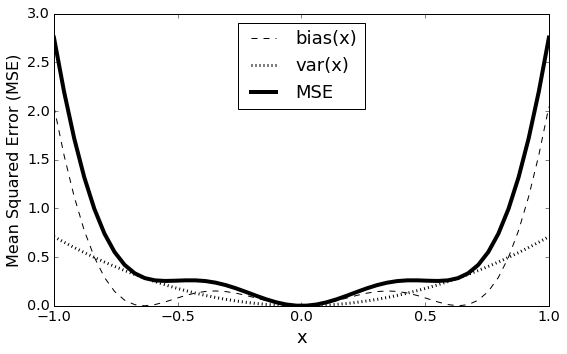

In [40]:
fig,ax=subplots()
fig.set_size_inches((8,5))
_=ax.plot(xi,(1.43*xi-yi)**2,'--k',label='bias(x)')
_=ax.plot(xi,0.71*(xi)**2,':k',label='var(x)',lw=3.)
_=ax.plot(xi,(1.43*xi-yi)**2+0.71*(xi)**2,color='k',lw=4,label='MSE')
_=ax.legend(fontsize=18,loc=0)
_=ax.set_ylabel('Mean Squared Error (MSE)',fontsize=16)
_=ax.set_xlabel('x',fontsize=18)
_=ax.tick_params(labelsize='x-large')
fig.tight_layout()
#fig.savefig('fig-machine_learning/learning_theory_007.pdf')

What if we had more than two points in the training data? What would happen to
$\texttt{var}$ and $\texttt{bias}$?  Certainly, the $\texttt{var}$ would
decrease because it would be harder and harder to generate training data sets
that would be substantially different from each other. The bias would also
decrease because more points in the training data means better approximation of
the sine function over the interval. What would happen if we changed the
hypothesis set to include more complex polynomials?  As we have already seen
with our polynomial regression earlier in this chapter, we would see the same
overall effect as here, but with relatively smaller absolute errors and the
same edge effects we noted earlier. The corresponding Jupyter/IPython Notebook
has the source code to help you can try these ideas and see for yourself.

## Learning Noise

We have thus far not considered the effect of noise in our analysis
of learning. The following example should help resolve this. Let's suppose
we have the following scalar target function,

$$
y(\mathbf{x})=\mathbf{w}_o^T \mathbf{x} + \eta
$$

 where $\eta \sim \mathcal{N}(0,\sigma^2)$ is an additive noise term
and $\mathbf{w}, \mathbf{x} \in \mathbb{R}^d$. Furthermore, we have $n$
measurements of $y$. This means the training set consists of $\lbrace
(\mathbf{x}_i,y_i) \rbrace_{i=1}^n$. Stacking the measurements together into a
vector format,

$$
\mathbf{y}=\mathbf{X} \mathbf{w}_o + \boldsymbol{\eta}
$$

 with $\mathbf{y},\boldsymbol{\eta}\in\mathbb{R}^n$,$\mathbf{w}_o\in
\mathbb{R}^d$ and $\mathbf{X}$ contains $\mathbf{x}_i$ as columns.  The
hypothesis set consists of all linear models,

$$
h(\mathbf{w},\mathbf{x}) = \mathbf{w}^T \mathbf{x}
$$

 We need to the learn the correct $\mathbf{w}$ from the
hypothesis set given the training data. So far, this is the usual
setup for the problem, but how does the noise factor play to this? In
our usual situation, the training set consists of randomly chosen
elements from a larger space. In this case, that would be the same as
getting random sets of $\mathbf{x}_i$ vectors. That still happens in
this case, but the problem is that even if the same $\mathbf{x}_i$
appears twice, it will not be associated with the same $y$ value due
the additive noise coming from $\eta$. To keep this simple, we assume
that there is a fixed set of $\mathbf{x}_i$ vectors and that we get
all of them in the training set.  For every specific training set, we
know how to solve for the MMSE from our earlier statistics work,

$$
\mathbf{w} =  (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

Given this setup, what is the in-sample mean-squared-error? Because
this is the MMSE solution, we know from our study of the associated 
orthogonality of such systems that we have,

<!-- Equation labels as ordinary links -->
<div id="eq:Ein"></div>

$$
\begin{equation}
E_{\texttt{in}}=\lVert \mathbf{y} \rVert^2 - \lVert \mathbf{X w} \rVert^2 
\label{eq:Ein} \tag{2}
\end{equation}
$$

 where our best hypothesis, $\mathbf{h} = \mathbf{X w}$. Now, we want
to compute the expectation of this over the distribution of $\eta$.  For
instance, for the first term, we want to compute,

$$
\mathbb{E} \lvert \mathbf{y} \rvert^2 = \frac{1}{n} \mathbb{E} (\mathbf{y}^T \mathbf{y}) = \frac{1}{n} \mathrm{Tr} \: \mathbb{E} (\mathbf{y} \mathbf{y}^T)
$$

 where $\mathrm{Tr}$ is the matrix trace operator (i.e., sum of the diagonal
elements). Because each $\eta$ are independent, we have

<!-- Equation labels as ordinary links -->
<div id="eq:eyy"></div>

$$
\begin{equation}
\mathrm{Tr} \: \mathbb{E} (\mathbf{y} \mathbf{y}^T) = \mathrm{Tr} \: \mathbf{X} \mathbf{w}_o \mathbf{w}_o^T \mathbf{X}^T + \sigma^2 \mathrm{Tr} \: \mathbf{I} = \mathrm{Tr} \: \mathbf{X} \mathbf{w}_o \mathbf{w}_o^T \mathbf{X}^T + n \sigma^2
\label{eq:eyy} \tag{3}
\end{equation}
$$

 where $\mathbf{I}$ is the $n \times n$ identity matrix. For the
second term in Equation \eqref{eq:Ein}, we have

$$
\lvert\mathbf{X w} \rvert^2 = \mathrm{Tr} \: \mathbf{X w}\mathbf{w}^T \mathbf{X}^T = \mathrm{Tr}\: \mathbf{X} (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y} \mathbf{y}^T \mathbf{X} (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T
$$

 The expectation of this is the following,

<!-- Equation labels as ordinary links -->
<div id="_auto1"></div>

$$
\begin{equation}
\mathbb{E} \lvert \mathbf{X w} \rvert^2 = \mathrm{Tr} \:  \mathbf{X} (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbb{E}(\mathbf{y} \mathbf{y}^T) \mathbf{X} (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T
\label{_auto1} \tag{4}
\end{equation}
$$

 which, after substituting in Equation ref{eq:eyy}, yields,

<!-- Equation labels as ordinary links -->
<div id="_auto2"></div>

$$
\begin{equation}
\mathbb{E} \lvert \mathbf{X w} \rvert^2 = \mathrm{Tr} \:  \mathbf{X} \mathbf{w}_o \mathbf{w}_o^T \mathbf{X}^T + \sigma^2 d
\label{_auto2} \tag{5}
\end{equation}
$$

 Next, assembling Equation ref{eq:Ein} from this and Equation ref{eq:eyy} gives,

<!-- Equation labels as ordinary links -->
<div id="_auto3"></div>

$$
\begin{equation}
\mathbb{E}(E_{\texttt{in}})=\frac{1}{n}E_{\texttt{in}}=\sigma^2 \left(1-\frac{d}{n}\right)
\label{_auto3} \tag{6}
\end{equation}
$$

 which provides an explicit relationship between the noise power,
$\sigma^2$, the complexity of the method ($d$) and the number of training
samples ($n$).  This is very illustrative because it reveals the ratio $d/n$,
which is a statement of the trade-off between model complexity and in-sample
data size. From our analysis of the VC-dimension, we already know that there is
a complicated bound that represents the penalty for complexity, but this
problem is unusual in that we can actually derive an expression for this
without resorting to bounding arguments. Furthermore, this result shows, that
with a very large number of training examples ($n \rightarrow \infty$), the
expected in-sample error approaches $\sigma^2$. Informally, this means that the
learning method cannot *generalize* from noise and thus can only reduce the
expected in-sample error by memorizing the data (i.e., $d \approx n$).

The corresponding analysis for the expected out-of-sample error is similar, 
but more complicated because we don't have the orthogonality condition. Also,
the out-of-sample data has different noise from that used to derive the weights,
$\mathbf{w}$. This results in extra cross-terms,

<!-- Equation labels as ordinary links -->
<div id="_auto4"></div>

$$
\begin{equation}
E_{\texttt{out}} = \mathrm{Tr} \Biggl( \mathbf{X} \mathbf{w}_o \mathbf{w}_o^T \mathbf{X}^T + \boldsymbol{\xi} \boldsymbol{\xi}^T + \mathbf{X} \mathbf{w} \mathbf{w}^T \mathbf{X}^T - \mathbf{X} \mathbf{w} \mathbf{w}_o^T \mathbf{X}^T \notag
\label{_auto4} \tag{7}
\end{equation}
$$

<!-- Equation labels as ordinary links -->
<div id="_auto5"></div>

$$
\begin{equation} \
                   - \mathbf{X} \mathbf{w}_o \mathbf{w}^T \mathbf{X}^T \Biggr)
\label{_auto5} \tag{8}
\end{equation}
$$

 where we are using the $\boldsymbol{\xi}$ notation for the noise in the
out-of-sample case, which is different from that in the in-sample case.
Simplifying this leads to the following,

<!-- Equation labels as ordinary links -->
<div id="_auto6"></div>

$$
\begin{equation}
\mathbb{E}(E_{\texttt{out}})=\mathrm{Tr}\: \sigma^2 \mathbf{I}  + \sigma^2 \mathbf{X}(\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T
\label{_auto6} \tag{9}
\end{equation}
$$

 Then, assembling all of this gives,

<!-- Equation labels as ordinary links -->
<div id="eq:Eout"></div>

$$
\begin{equation}
\mathbb{E}(E_{\texttt{out}}) = \sigma^2 \left(1+\frac{d}{n}\right) 
\label{eq:Eout} \tag{10}
\end{equation}
$$

 which shows that even in the limit of large $n$, the expected
out-of-sample error also approaches the noise power limit, $\sigma^2$. This
shows that memorizing the in-sample data (i.e., $d/n \approx 1$) imposes a
proportionate penalty on the out-of-sample performance (i.e., $\mathbb{E}
E_{\texttt{out}} \approx 2\sigma^2$ when $\mathbb{E}E_{\texttt{in}} \approx 0$
).

The following code simulates this important example:

In [41]:
def est_errors(d=3,n=10,niter=100):
    assert n>d
    wo = np.matrix(arange(d)).T 
    Ein = list()
    Eout = list()
    # choose any set of vectors
    X = np.matrix(np.random.rand(n,d)) 
    for ni in xrange(niter):
        y = X*wo + np.random.randn(X.shape[0],1)
        # training weights
        w = np.linalg.inv(X.T*X)*X.T*y
        h = X*w
        Ein.append(np.linalg.norm(h-y)**2)
        # out of sample error
        yp = X*wo + np.random.randn(X.shape[0],1)
        Eout.append(np.linalg.norm(h-yp)**2)
    return (np.mean(Ein)/n,np.mean(Eout)/n)

**Programming Tip.**

Python has an `assert` statement to make sure that certain entry conditions for
the variables in the function are satisfied.  It is a good practice to use
reasonable assertions at entry and exit to improve the quality of code.



 The following runs the simulation for the given value of $d$.

In [42]:
d=10
xi = arange(d*2,d*10,d//2)
ei,eo=np.array([est_errors(d=d,n=n,niter=100) for n in xi]).T

 which results in [Figure](#fig:learning_theory_008). This
figure shows the estimated expected in-sample and out-of-sample errors
from our simulation compared with our  corresponding analytical
result. The heavy horizontal line shows the variance of the additive
noise $\sigma^2=1$. Both these curves approach this asymptote because
the noise is the ultimate learning limit for this problem. For a given
dimension $d$, even with an infinite amount of training data, the
learning method cannot generalize beyond the limit of the noise power.
Thus, the expected generalization error is
$\mathbb{E}(E_{\texttt{out}})-\mathbb{E}(E_{\texttt{in}})=2\sigma^2\frac{d}{n}$.

<!-- dom:FIGURE: [fig-machine_learning/learning_theory_008.png, width=500 frac=0.85]  The dots show the learning curves estimated from the simulation and the solid lines show the corresponding terms for our analytical result. The horizontal line shows the variance of the additive noise ($\sigma^2=1$ in this case). Both the expected in-sample and out-of-sample errors asymptotically approach this line. <div id="fig:learning_theory_008"></div> -->
<!-- begin figure -->
<div id="fig:learning_theory_008"></div>

<p>The dots show the learning curves estimated from the simulation and the solid lines show the corresponding terms for our analytical result. The horizontal line shows the variance of the additive noise ($\sigma^2=1$ in this case). Both the expected in-sample and out-of-sample errors asymptotically approach this line.</p>
<img src="fig-machine_learning/learning_theory_008.png" width=500>

<!-- end figure -->

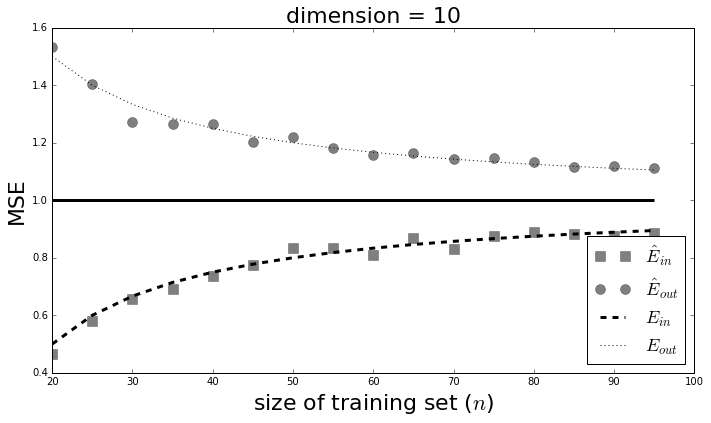

In [43]:
fig,ax=subplots()
fig.set_size_inches((10,6))
_=ax.plot(xi,ei,'ks',label=r'$\hat{E}_{in}$',lw=3.,ms=10,alpha=.5)
_=ax.plot(xi,eo,'ko',label=r'$\hat{E}_{out}$',lw=3.,ms=10,alpha=.5)
_=ax.plot(xi,(1-d/np.array(xi)),'--k',label=r'${E}_{in}$',lw=3)
_=ax.plot(xi,(1+d/np.array(xi)),':k',label=r'${E}_{out}$')
_=ax.hlines(1,xi.min(),xi.max(),lw=3)
_=ax.set_xlabel('size of training set ($n$)',fontsize=22)
_=ax.set_ylabel('MSE',fontsize=22)
_=ax.legend(loc=4,fontsize=18)
_=ax.set_title('dimension = %d'%(d),fontsize=22)
fig.tight_layout()
#fig.savefig('fig-machine_learning/learning_theory_008.png')

In [44]:
sys.displayhook= old_displayhook